# 2016年美国共享单车活动快照

## 目录
- [简介](#intro)
- [提出问题](#pose_questions)
- [数据收集和整理](#wrangling)
  - [浓缩骑行数据](#condensing)
- [探索性数据分析](#eda)
  - [统计数据](#statistics)
  - [可视化界面](#visualizations)
- [进行你自己的分析](#eda_continued)
- [总结](#conclusions)

<a id='intro'></a>
## 简介

>

过去十年里，世界各城市的共享单车系统不仅不断增多，也越来越受人们欢迎。用户可借助共享单车系统来租赁单车，进行通常在 30 分钟以内的短途骑行。由于信息科技的崛起，用户能够方便地找到所用系统的停车点，实现单车解锁或归还操作。不仅如此，信息科技还带来了大量数据，有了这些数据，我们就能研究共享单车系统的使用情况。

这是一家为美国诸多大城市提供共享单车系统的供应商。将比较三大城市：纽约市、芝加哥和华盛顿特区的系统使用情况，并观察每个系统的长期注册用户和短期临时用户之间有无区别。

<a id='pose_questions'></a>
## 提出问题

**问题 1**: 写出至少两个你觉得能用数据解决的共享单车相关问题。

**答案**：1、共享单车哪些人使用最多？ 2、用车频率如何？


## 数据收集与整理

现在是时候收集并探索数据了。在本项目中，我们将重点关注所选城市：纽约市、芝加哥、华盛顿特区 2016 年的个人骑行记录。每座城市均有相关页面供我们随时下载骑行数据：

- 纽约市(Citi Bike): [链接](https://www.citibikenyc.com/system-data)
- 芝加哥 (Divvy): [链接](https://www.divvybikes.com/system-data)
- 华盛顿特区 (Capital Bikeshare): [链接](https://www.capitalbikeshare.com/system-data)



**问题 2**: 尽管如此，我们要研究的数据还有很多，因此，我们最好先观察各目标分析城市的某一则记录。运行下方第一个代码框，加载一些分析所需的包和函数，然后完成第二个代码框，使其分别输出各城市的第一条骑行记录（也即每个数据文件的第二行）。



In [1]:
## 导入所有必要的包和函数。
import csv # 读写 csv 文件
from datetime import datetime # 日期解析操作
from pprint import pprint # 用于输出字典等数据结构
                          # 这比 base print 函数要好用。

In [2]:
def print_first_point(filename):
    # 输出城市名以供参考
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## 待办：用 csv 库来设置一个 DictReader 对象。##
        ## 见 https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        ## 待办：对 DictReader 对象使用函数     ##
        ## 从而读取数据文件的第一条骑行记录并将其存储为一个变量     ##
        ## 见 https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = trip_reader.__next__()
        
        ## 待办：用 pprint 库来输出第一条骑行记录。 ##
        ## 见 https://docs.python.org/3/library/pprint.html     ##
        pprint(dict(first_trip))
    # 输出城市名和第一条骑行记录以备测试
    return (city, first_trip)

# 各城市的文件列表
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# 输出各文件的第一条骑行记录，并将其储存在字典中
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
{'bikeid': '17109',
 'birth year': '',
 'end station id': '401',
 'end station latitude': '40.72019576',
 'end station longitude': '-73.98997825',
 'end station name': 'Allen St & Rivington St',
 'gender': '0',
 'start station id': '532',
 'start station latitude': '40.710451',
 'start station longitude': '-73.960876',
 'start station name': 'S 5 Pl & S 4 St',
 'starttime': '1/1/2016 00:09:55',
 'stoptime': '1/1/2016 00:23:54',
 'tripduration': '839',
 'usertype': 'Customer'}

City: Chicago
{'bikeid': '2295',
 'birthyear': '1990',
 'from_station_id': '156',
 'from_station_name': 'Clark St & Wellington Ave',
 'gender': 'Male',
 'starttime': '3/31/2016 23:30',
 'stoptime': '3/31/2016 23:46',
 'to_station_id': '166',
 'to_station_name': 'Ashland Ave & Wrightwood Ave',
 'trip_id': '9080545',
 'tripduration': '926',
 'usertype': 'Subscriber'}

City: Washington
{'Bike number': 'W20842',
 'Duration (ms)': '427387',
 'End date': '3/31/2016 23:04',
 'End station': 'Georgia Ave and Fa


### 浓缩骑行数据

- **时长**：该值可能以秒数（纽约市、芝加哥）或毫秒数（华盛顿特区）表示，但就分析而言，分析单位为分钟更佳，所以如果能将所有骑行时长都以分钟表示就好了。
- **月份**, **小时**, **周几**：季节、一天的什么时候以及是否周末都有可能影响骑客量，请用骑行起始时间来获取这些值。纽约市数据的时间戳记录了秒数，而华盛顿特区和芝加哥的并没有。 此处使用 [`datetime`](https://docs.python.org/3/library/datetime.html) 包应大有帮助，该包可实现必要的转换操作。
- **用户类型**： 共享单车系统的注册用户可能与临时用户有不同的使用模式。华盛顿特区将其用户分为两种：‘注册用户’ ——这类用户买了较长时期的会员，如年度会员或月度会员；‘临时用户’——这类用户所购买的骑行时间较短，如只有 24 小时或 3 天。纽约市和芝加哥的数据则用 ‘会员’ 和 ‘散客’ 来区分这两者。为了保证数据的一致性，需要修改华盛顿特区的标签，使其与另外两座城市的标签相同。


**问题 3a**：完成下方代码框中的辅助函数，完成上述各项清理任务。

In [7]:
def duration_in_mins(datum, city):
    if city == 'Washington':
        d_min = float(datum['Duration (ms)'])
        duration = round(d_min / 60000,4)       
    else:
        d_min = float(datum['tripduration'])
        duration = round(d_min / 60,4)
    # 请在此处写出代码
    return duration


# 测试代码是否奏效，若所有断言都没问题，则不应有输出出现。
# 至于字典 `example_trips` 
# 则是在你输出每个数据源文件的第一条骑行数据时生成的。
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [8]:
def time_of_trip(datum, city):
    if city == 'Washington':
        m = datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M")
        month = m.month
        hour = m.hour
        day_of_week = m.strftime('%A')
    elif city == 'Chicago':
        m = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M")
        month = m.month
        hour = m.hour
        day_of_week = m.strftime('%A')
    elif city == 'NYC':
        m = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S")
        month = m.month
        hour = m.hour
        day_of_week = m.strftime('%A')
    # 请在此处写出代码    
    return (month, hour, day_of_week)

tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [9]:
def type_of_user(datum, city):
 
    if city == 'Washington':
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        elif datum['Member Type'] == 'Casual':
            user_type = 'Customer'
    else:
        user_type = datum['usertype']            
    # 请在此处写出代码    
    return user_type


tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

In [10]:
def condense_data(in_file, out_file, city):

    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # 设置 csv DictWriter 对象——该对象需将第一列列名
        # 作为 "fieldnames" 参数
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## 待办：设置 csv DictReader 对象##
        trip_reader = csv.DictReader(f_in)
        # 收集并处理每行的数据
        for row in trip_reader:
            # 设置一个字典来存储清理和修剪后的数据点的值
            new_point = {}
            ## 待办：使用辅助函数来从原始数据字典中获取清理数据##
            new_point['duration'] = duration_in_mins(row,city)
            # new_point['month', 'hour', 'day_of_week'] = time_of_trip(row,city) 
            month, hour, day_of_week = time_of_trip(row,city)
            new_point['month'] = month
            new_point['hour'] = hour
            new_point['day_of_week'] = day_of_week
            # print("The dimensions are {}x{}x{}".format(month, hour, day_of_week))
            new_point['user_type'] = type_of_user(row,city)
            ## 注意字典 new_point 的关键词应与 ##
            ## 上述 DictWriter 对象设置的列名一致。        ##            
            trip_writer.writerow(new_point)
            ## 待办：在输出文件中写出处理后的信息。##
            ## 见 https://docs.python.org/3/library/csv.html#writer-objects ##
            
            

In [11]:
# 运行下框以测试效果
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
{'day_of_week': 'Thursday',
 'duration': '7.1231',
 'hour': '22',
 'month': '3',
 'user_type': 'Subscriber'}

City: Chicago
{'day_of_week': 'Thursday',
 'duration': '15.4333',
 'hour': '23',
 'month': '3',
 'user_type': 'Subscriber'}

City: NYC
{'day_of_week': 'Friday',
 'duration': '13.9833',
 'hour': '0',
 'month': '1',
 'user_type': 'Customer'}



## 探索性数据分析


### 统计数据

首先，我们来进行一些基本统计。下方的第一个框里包括了一个函数，该函数会用 csv 模块来对给定的数据文件进行迭代处理，并返回会员和散客的骑行次数。第二个框则会运行 `/examples/` 文件夹里湾区示例数据中的函数。修改下框，回答下列问题。

**问题 4a**：哪座城市的骑行次数最多？哪座城市会员进行的骑行次数占比最高？哪座城市散客进行的骑行次数占比最高？

**答案**：纽约市的骑行次数多。纽约市会员进行的骑行次数占比最高。芝加哥市散客进行的骑行次数占比最高。

In [12]:
def number_of_trips(filename):
    """
    本函数会读取一个骑行数据文件，分别报告
    会员、散客和所有系统用户的骑行次数。
    """
    with open(filename, 'r') as f_in:
        # 设置 csv reader 对象
        reader = csv.DictReader(f_in)
        
        # 初始化计数变量
        n_subscribers = 0
        n_customers = 0
        n_total = 0       
        # 计算骑行类型
        
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        # 统计骑行总次数
        n_total = n_subscribers + n_customers
        
        # 将结果作为数组返回出来
        return(n_subscribers, n_customers, n_total, round(n_subscribers/n_total*100,1), round(n_customers/n_total*100,1))

In [14]:
## 修改此框及上框，回答问题 4a。##
## 记得运行你在问题 3 中创建的数据文件清理函数。     ##

data_files1 = './data/Washington-2016-Summary.csv'
data_files2 = './data/Chicago-2016-Summary.csv'
data_files3 = './data/NYC-2016-Summary.csv'
              
print('Washington',number_of_trips(data_files1))
print('Chicago',number_of_trips(data_files2))
print('NYC',number_of_trips(data_files3))


Washington (51753, 14573, 66326, 78.0, 22.0)
Chicago (54982, 17149, 72131, 76.2, 23.8)
NYC (245896, 30902, 276798, 88.8, 11.2)



**问题 4b**：共享单车系统是为短途骑行者而设的。大多数时候，用户在 30 分钟内骑行无需额外付费，若是超过该时长，则需支付超时费用。那么，各城市的平均骑行时长是多少？各城市骑行时长超过 30 分钟的比例又是多少？

**答案**：在华盛顿数据中，平均骑行时常为19分钟，骑行时长多于 30 分钟的数据占比 11%。
       在芝加哥数据中，平均骑行时常为17分钟，骑行时长多于 30 分钟的数据占比 8%。
       在纽约市数据中，平均骑行时常为16分钟，骑行时长多于 30 分钟的数据占比 7%。

In [16]:
## 使用本框及新框来回答问题 4b。               ##
##                                                                      ##
## 提示：csv 模块会将所有数据读取为字符串，包括数值。 ##
## 因此，在统计数据之前，你需要用函数将字符串转换为      ##
## 合适的数值类型。         ##
## 小贴士：在湾区示例数据中，平均骑行时长为 14 分钟，##
## 骑行时长多于 30 分钟的数据占比 3.5%。                      ##
def duration_of_trips(filename):
    with open(filename, 'r' ) as f_in:
        reader = csv.DictReader(f_in)
        n_duration_trip = 0 
        ##n_dudration_trip：超过30分钟的骑行次数
        n_duration = 0
        ##n_duration骑行总时长
        n_trip = 0
        ##总骑行次数
        n_duration_avg = 0
        ##n_duration_av平均骑行时长
        n_duration_ratio = 0
        ##骑行时长超过 30 分钟的比例n_duration_ratio
        for row in reader:
            n_duration += float(row['duration'])
            n_trip += 1
            if float(row['duration'])  > 30:
                n_duration_trip += 1
        n_duration_avg = round(n_duration/n_trip)
        n_duration_ratio = round(n_duration_trip/n_trip*100)
    return (n_duration_avg, n_duration_ratio)

data_files1 = './data/Washington-2016-Summary.csv'
data_files2 = './data/Chicago-2016-Summary.csv'
data_files3 = './data/NYC-2016-Summary.csv'
              
print('Washington:',duration_of_trips(data_files1))
print('Chicago:',duration_of_trips(data_files2))
print('NYC:',duration_of_trips(data_files3))
                
    



Washington: (19, 11)
Chicago: (17, 8)
NYC: (16, 7)


**问题 4c**：从骑客量的角度更深入地挖掘骑行时长问题。选择一座城市，研究该城市哪种系统用户的平均骑行时间更长？是会员还是散客？

**答案**：在华盛顿数据中，会员平均骑行时长为 12.5 分钟，散客平均骑行时长则为 41.7 分钟，散客的平均骑行时间更长。

In [17]:
## 使用本框及新框来回答问题 4c。##
## 如果你还没这么做过，你可以考虑修改之前的代码   ##
## 利用一些可重复利用的函数。                            ##
##                                                                     ##
## 小贴士：在海湾示例数据中，你应该发现    ##
## 会员平均骑行时长为 9.5 分钟，散客平均骑行时长则为##
## 54.6 分钟，其它城市区别也这么大吗？     ##
def number_of_trips_min(filename):
    with open(filename, 'r' ) as f_in:
        reader = csv.DictReader(f_in)
        n_duration_subscribers = 0 ##该城市会员骑行总时长
        n_duration_customers = 0   ##该城市散客骑行总时长
        n_duration_subscribers_avg = 0 ##该城市会员平均骑行时常
        n_duration_customers_avg = 0 ##该城市散客平均骑行时常
##调用number_of_trips函数获取会员和散客各自骑行次数
        n_subscribers,n_customers,n_total,n_subscribers_ratio,n_customers_ratio = number_of_trips(filename)             
        # 根据用户类型计算骑行时长
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_duration_subscribers += float(row['duration'])
            else:
                n_duration_customers += float(row['duration'])
        # 统计会员与散客的平均骑行时常
        n_duration_subscribers_avg = round(n_duration_subscribers / n_subscribers,1)
        n_duration_customers_avg = round(n_duration_customers / n_customers,1)
        return(n_duration_subscribers_avg,n_duration_customers_avg)
                
##以华盛顿举例子
data_files1 = './data/Washington-2016-Summary.csv'            
print('Washington:',number_of_trips_min(data_files1))           





Washington: (12.5, 41.7)


<a id='visualizations'></a>
### 可视化界面

最后一组值应该会出现相当有趣的结果：会员平均骑行时长远低于 30 分钟，而散客的平均骑行时长则的的确确 _超过_了 30 分钟！要是能观察骑行时长的分布，应该会很有趣，为此，我们需要引入一个新库，即 `matplotlib`。请运行下框，加载该库以生成示例图。

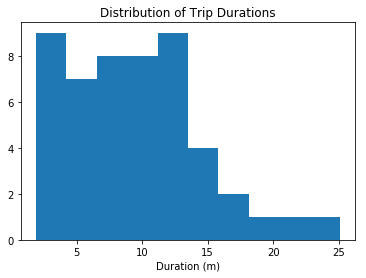

In [19]:
# 加载库
import matplotlib.pyplot as plt

# 这个'咒语'能展示图形。
# 内联 notebook，详见：
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# 直方图示例，数据来自湾区样本
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

在上框中，我们收集了五十个骑行时长数据，制成列表，并将该列表作为 `.hist()` 函数的第一个参数，该函数会进行统计并生成绘图对象，以便生成直方图，但我们需要执行 `.show()` 函数才能呈现统计图。`.title()` 和 `.xlabel()` 函数则提供一些标签，以便说明统计图的背景。


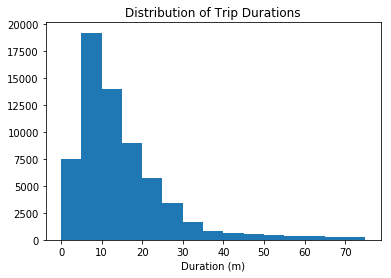

In [20]:
## 使用本框及新框来收集所有骑行时长并制成列表。##
## 使用 pyplot 函数来为骑行时长生成直方图。 ##
import csv
# 加载库
import matplotlib.pyplot as plt
with open('./data/Washington-2016-Summary.csv', 'r' ) as f_in:
    reader = csv.DictReader(f_in)
    data = []
    for row in reader:
        data.append(round(float(row['duration'])))
# 这个'咒语'能展示图形。
# 内联 notebook，详见：
# http://ipython.readthedocs.io/en/stable/interactive/magics.html

# 直方图示例，数据来自湾区样本

plt.hist(data,bins = range(0,80,5))
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()
        



**问题 5**：用 `.hist()` 函数的参数来为所选城市的会员骑行时长绘制分布图，并单独为散客做同样的操作。限制统计图的范围，仅绘制骑行时长小于 75 分钟的数据。

**答案**：在华盛顿的会员骑行时长绘制分布图中数据集中在0-30分钟之间，峰值出现在接近10分钟的位置，而后开始逐渐下降。
        在散客骑行时长绘制分布图中，数据在接近20分钟处出现峰值，30-75分钟的出行次数较为接近。

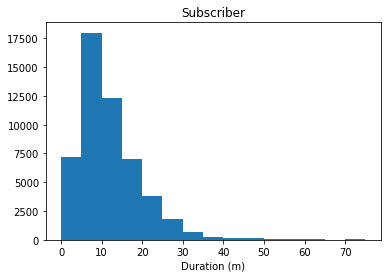

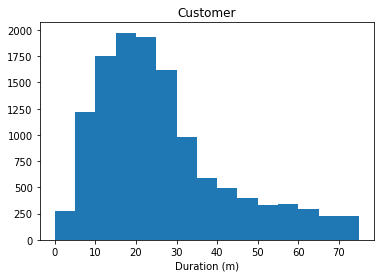

In [21]:
## 使用本框及新框来回答问题 5##
import csv
import matplotlib.pyplot as plt
# 加载库
with open('./data/Washington-2016-Summary.csv', 'r' ) as f_in:
    reader = csv.DictReader(f_in)
    data_Subscriber = []
    ##会员骑行次数
    data_Customer = []
    ##散客骑行次数
    for row in reader:
        if row['user_type'] == 'Subscriber':
            data_Subscriber.append(round(float(row['duration'])))
            ##会员骑行列表
        else:
            data_Customer.append(round(float(row['duration'])))
            ##散客骑行列表
plt.hist(data_Subscriber,bins = range(0,80,5))
##会员直方图
plt.title('Subscriber')
plt.xlabel('Duration (m)')
plt.show()
plt.hist(data_Customer,bins = range(0,80,5))
##散客直方图
plt.title('Customer')
plt.xlabel('Duration (m)')
plt.show()
            

            


**问题 6**：探索另一个可用数据回答的问题，继续研究。在下方写下你想探索的问题，你的研究至少应包括两个变量，对比两组数据并使用一个可视化界面。

**答案**: 华盛顿周末和工作日的系统用户骑行模式有何区别？哪一天会员更可能使用骑行系统？散客呢？平均骑行时长会受一周内不同日期的影响吗？
       研究 ：①根据“Comparison of cycling duration in Washington on working days and rest days”直方图可以看出。
             华盛顿的休息日与工作日在超过30分钟的骑行次数中大体一致，在不超过30分钟的骑行次数中，工作日远高于休息日。
            ②根据“Subscriber and Customer”直方图可以看出，周一到周五，华盛顿共享单车会员的骑行次数大体是散客骑行次数
             的4倍，在休息日周六和周日中，散客的骑行次数已经超过了会员骑行次数的一半。
            ③周日平均骑行时长是24分钟，周六平均骑行时长是25分钟，周五平均骑行时长是18分钟，周四平均骑行时长是17分钟，
             周三平均骑行时长是16分钟，周二平均骑行时长是17分钟，周一平均骑行时长是18分钟。
             可以看出受工作日和休息日的影响，一周的每一天平均骑行时常是有差别的，周六与周日骑行的平均时常要远高于周一到周五的
             骑行平均时长。

华盛顿休息日骑行次数： 17127 华盛顿工作日骑行次数： 49199


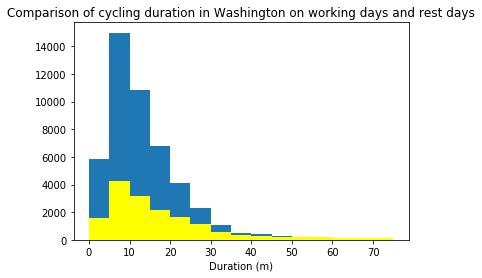

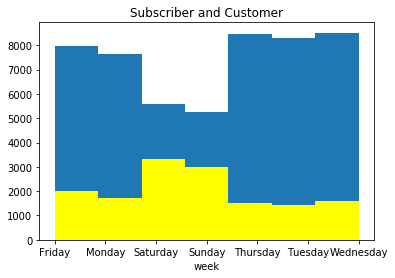

周日平均骑行时长： 24 周六平均骑行时长： 25 周五平均骑行时长： 18 周四平均骑行时长： 17 周三平均骑行时长： 16 周二平均骑行时长： 17 周一平均骑行时长： 18


In [22]:
## 使用本框及新框来继续探索数据集。 ##
## 一旦你进行了自己的探索，请写下你的发现 ##
## 请将发现写在上方的 Markdown 框中。                                     ##
# 加载库
import csv
import matplotlib.pyplot as plt
##用户周末与工作日对比函数
def duration_WeekendAndWorkday(filename):
    with open(filename, 'r' ) as f_in:
        reader = csv.DictReader(f_in)
        data_workday = []
    ##工作日骑行时长
        data_weekend = []
    ##周末骑行时长
        s_workday = 0
    ##工作日骑行次数
        s_weekend = 0
    ##休息日骑行次数
    
    ##计算工作日和休息日骑行对比
        for row in reader:
            if row['day_of_week'] == 'Saturday' or row['day_of_week'] == 'Sunday':
                s_weekend += 1
                data_weekend.append(round(float(row['duration'])))
            else:
                s_workday += 1
                data_workday.append(round(float(row['duration'])))
        return (s_weekend,s_workday,data_weekend,data_workday)
##会员与散客周一到周日对比函数   
def week(filename):
    with open(filename, 'r' ) as f_in:
        reader = csv.DictReader(f_in)
        data_Subscriber = []
    ##会员每周骑行
        data_Customer = []
    ##散客每周骑行
    
    ##会员和散客的周一到周日对比
        for row in reader:
            if row['user_type'] == 'Subscriber':
                data_Subscriber.append(row['day_of_week'])
            else: 
                data_Customer.append(row['day_of_week']) 
        return data_Subscriber,data_Customer
    
## 平均骑行时长会对于一周内不同日期的影响   
def week_duration(filename):
    ##周一到周日骑行次数
    s_Sunday,s_Saturday,s_Friday,s_Thursday,s_Wednesday,s_Tuesday,s_Monday = (0, 0, 0, 0, 0, 0, 0)
    ##周一到周日骑行时常
    d_Sunday,d_Saturday,d_Friday,d_Thursday,d_Wednesday,d_Tuesday,d_Monday = (0, 0, 0, 0, 0, 0, 0)
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            if row['day_of_week'] == 'Sunday':
                s_Sunday += 1
                d_Sunday += float(row['duration']) 
            elif row['day_of_week'] == 'Saturday':
                s_Saturday += 1
                d_Saturday += float(row['duration'])
            elif row['day_of_week'] == 'Friday':
                s_Friday += 1
                d_Friday += float(row['duration'])             
            elif row['day_of_week'] == 'Thursday':
                s_Thursday += 1
                d_Thursday += float(row['duration'])  
            elif row['day_of_week'] == 'Wednesday':
                s_Wednesday += 1
                d_Wednesday += float(row['duration'])  
            elif row['day_of_week'] == 'Tuesday':
                s_Tuesday += 1
                d_Tuesday += float(row['duration']) 
            elif row['day_of_week'] == 'Monday':
                s_Monday += 1
                d_Monday += float(row['duration'])  
    return (round(d_Sunday/s_Sunday),round(d_Saturday/s_Saturday),round(d_Friday/s_Friday),
            round(d_Thursday/s_Thursday),round(d_Wednesday/s_Wednesday),round(d_Tuesday/s_Tuesday),
            round(d_Monday/s_Monday))
                                
##调用用户周末与工作日对比函数
s_weekend,s_workday,data_weekend,data_workday = duration_WeekendAndWorkday('./data/Washington-2016-Summary.csv')
print("华盛顿休息日骑行次数：",s_weekend,"华盛顿工作日骑行次数：",s_workday)
##制图周末与工作日对比
##工作日直方图
plt.hist(data_workday,bins = range(0,80,5))
##标题
plt.title('Comparison of cycling duration in Washington on working days and rest days')
plt.xlabel('Duration (m)')
##休息日直方图
plt.hist(data_weekend,bins = range(0,80,5),facecolor='yellow')
plt.show()

##调用会员与散客周一到周日对比函数 
data_Subscriber,data_Customer = week('./data/Washington-2016-Summary.csv')
##会员与散客周一到周日对比制图
plt.hist(data_Subscriber,7)
plt.title('Subscriber and Customer')
plt.xlabel('week')
plt.hist(data_Customer,7,facecolor='yellow')
plt.show()

##调用平均骑行时长会对于一周内不同日期的影响函数
avg_Sunday,avg_Saturday,avg_Friday,avg_Thursday,avg_Wednesday,avg_Tuesday,avg_Monday = week_duration('./data/Washington-2016-Summary.csv')
print("周日平均骑行时长：",avg_Sunday,
      "周六平均骑行时长：",avg_Saturday,
      "周五平均骑行时长：",avg_Friday,
      "周四平均骑行时长：",avg_Thursday,
      "周三平均骑行时长：",avg_Wednesday,
      "周二平均骑行时长：",avg_Tuesday,
      "周一平均骑行时长：",avg_Monday)


<a id='conclusions'></a>
## 结论

**问题 7**：撇开共享单车数据不谈，想出一个你想应用数据科学技术的课题或领域。对于该课题，你想了解些什么？

**答案**：课题：滴滴打车的用户出行数据分析    想要了解的点：出行的常用路线，用户出行有哪些比较集中的目的地等等。

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis-zh.ipynb'])

0